## Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras.optimizers import RMSprop



import tensorflow as tf
import random

import pandas as pd

## Récupérer les données

In [13]:
mnist = tf.keras.datasets.mnist
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()


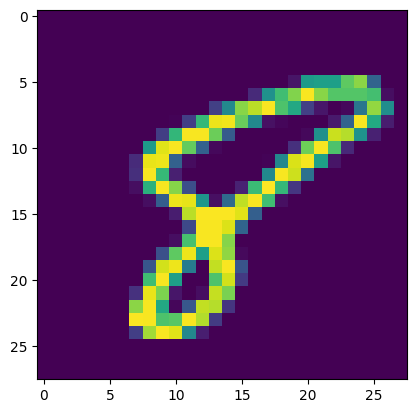

In [14]:
image_index = random.randint(0,mnist_train_images.shape[0])
plt.imshow(mnist_train_images[image_index])
plt.show()


Les images du dataset sont en fait des matrices de 28x28 qui contiennent donc 255 données. Chaque données sont un chiffre de 0 a 9.
<br>
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1.
<br>
De plus on utilisers l'encodage one-hot pour nos labels. Le labbel [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.


In [15]:
train_images = tf.keras.utils.normalize(mnist_train_images,axis=1)
test_images = tf.keras.utils.normalize(mnist_test_images,axis=1)

#Passage en one-hot
train_labels = tf.keras.utils.to_categorical(mnist_train_labels)
test_labels = tf.keras.utils.to_categorical(mnist_test_labels)


On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

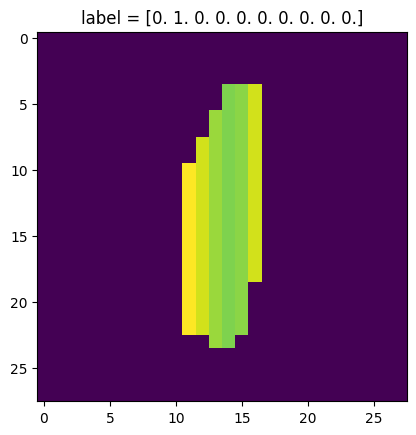

In [16]:
index = random.randint(0,len(train_images)) 
plt.imshow(train_images[index])
plt.title("label = " + str(train_labels[index]))
plt.show()

In [17]:
def createGraph(history,num_of_layer):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Gaph of the model accuracy with ' + str(num_of_layer) + ' layers')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Gaph of the model loss with ' + str(num_of_layer) + ' layers')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper right')
    plt.show()

In [18]:
def modelTraining(model,train_data,train_label,validation_data,validation_labels,epochs=10,batch_size=32):
    model.summary()    
    history = model.fit(train_data,train_label,epochs=epochs,batch_size=batch_size,validation_data=(validation_data,validation_labels))
    createGraph(history,len(model.layers)-1)


Hidden layer 1 = 512
Output layer = 10 car 10 possibilitées
<br>
Vu que les données d'entrées sont des matrice de 28x28 on doit les reduire en un vector, qui sera de taille 784. On utilise pour cela "layers.flatten"


## 0 hidden layers

On commence pour tester le model de base un model sans "hidden layers". La couche de sortie sera toujours de 10 car il y a 10 chiffres possibles. 

In [19]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28,28))) #input layer
model1.add(layers.Dense(10, activation='softmax')) #outpout layer
model1.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5548 - accuracy: 0.8658 - val_loss: 0.3404 - val_accuracy: 0.9085
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3325 - accuracy: 0.9059 - val_loss: 0.3120 - val_accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.9125 - val_loss: 0.3021 - val_accuracy: 0.9179
Epoch 4/10
1875/

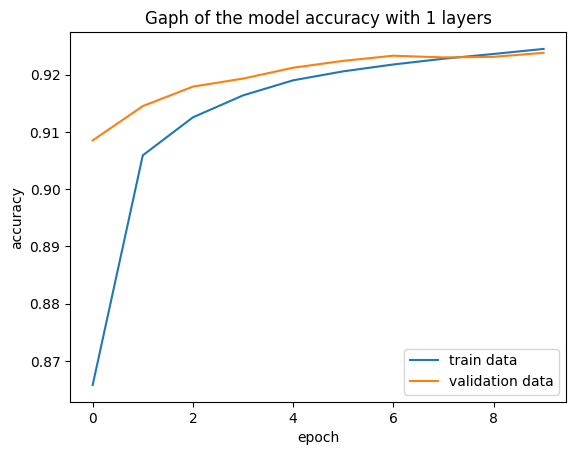

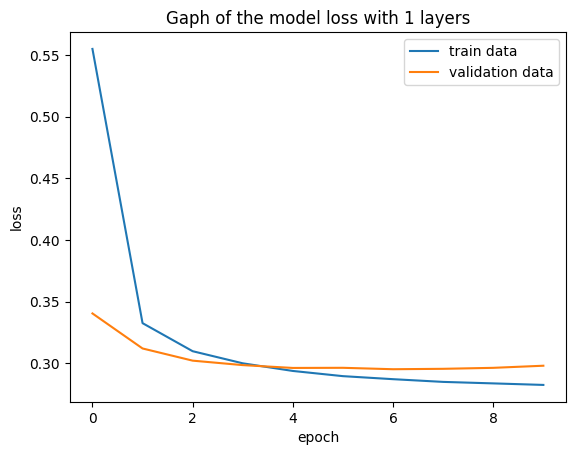

In [20]:
modelTraining(model1,train_images,train_labels,test_images,test_labels)

## 1 hidden layers

![alt text](<3layers.png>)

In [21]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28,28))) #input layer
model2.add(layers.Dense(128,activation='relu')) #hidden layer
model2.add(layers.Dense(10, activation='softmax')) #outpout layer
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3171 - accuracy: 0.9121 - val_loss: 0.1899 - val_accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1589 - accuracy: 0.9533 - val_loss: 0.1416 - val_accuracy: 0.9588
Epoch 3/10
1875/1875 [==

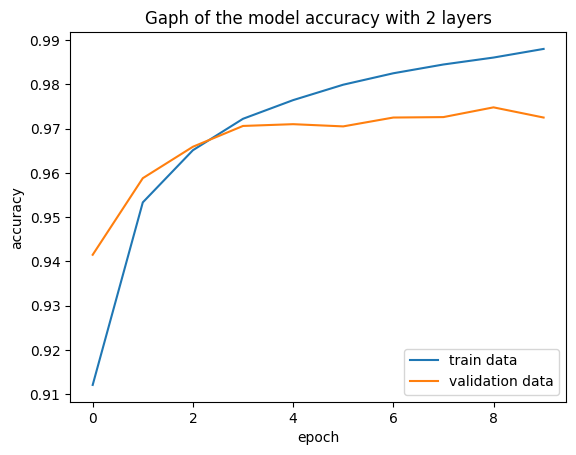

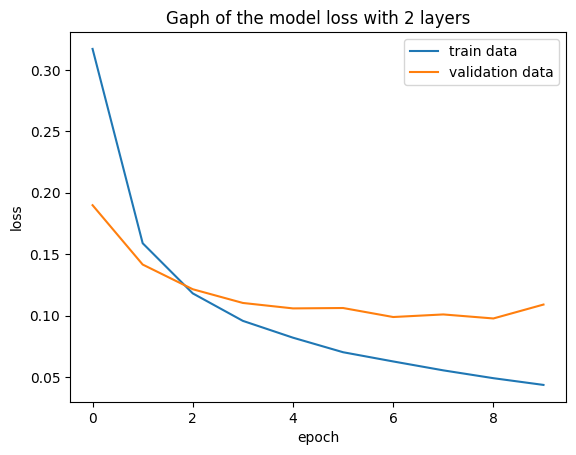

In [22]:
modelTraining(model2,train_images,train_labels,test_images,test_labels)

## Two hidden layers

![alt text](<4layers.png>)

In [23]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(28,28))) #input layer
model3.add(layers.Dense(128,activation='relu')) #hidden layer
model3.add(layers.Dense(128,activation='relu')) #hidden layer
model3.add(layers.Dense(10, activation='softmax')) #outpout layer
model3.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2601 - accuracy: 0.9243 - val_loss: 0.1457 - val_accuracy: 0.9546
Epoch 2/10
1875/1875 [==============

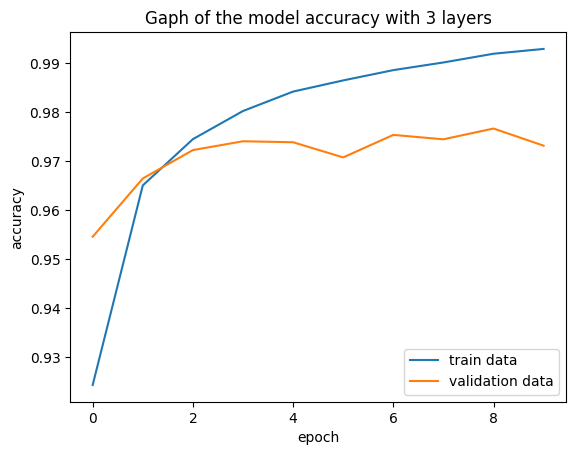

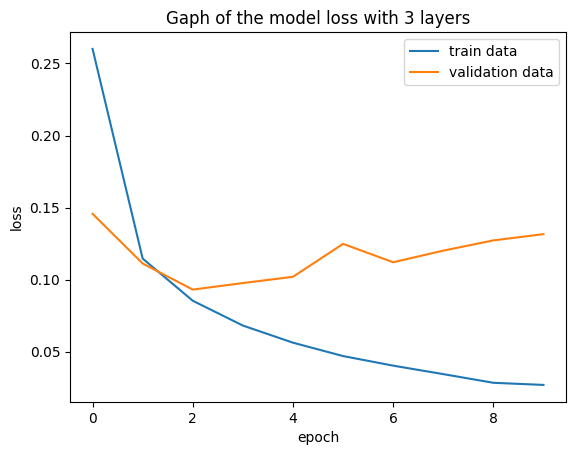

In [24]:
modelTraining(model3,train_images,train_labels,test_images,test_labels)

## Three hidden layers

In [25]:
model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(28,28))) #input layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(128,activation='relu')) #hidden layer
model4.add(layers.Dense(10, activation='softmax')) #outpout layer
model4.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==========================

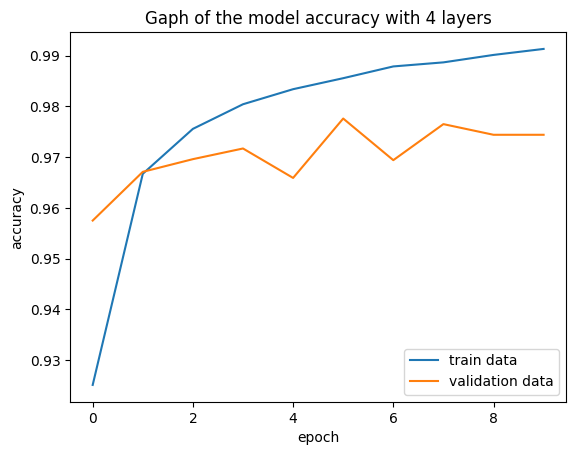

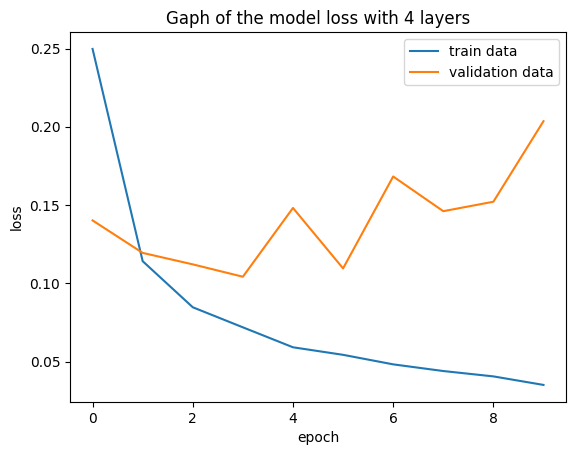

In [26]:
modelTraining(model4,train_images,train_labels,test_images,test_labels)

Comme on peut l'observer les reseaux avec plus de neurones semble avoir une meilleur "accuracy". Celui a 3 hiddens layers a environ 97% sur les données de validations, de même pour celui a 4 hiddens layers. Mais sur ce dernier la perte est plus importante. On va donc privilégié le model a 3 hidden layers.
<br>
Bien que le modèle soit performant il n'est pas parfait. Faisont un test afin de voir le tableau des prédictions.

In [27]:
prediction = model3.predict(test_images)
print(pd.crosstab(mnist_test_labels,prediction.argmax(axis=1),colnames=["Prédiction"], margins=True))

313/313 [==============================] - 1s 2ms/step
Prédiction    0     1     2     3    4    5    6     7    8     9    All
row_0                                                                   
0           969     1     1     0    0    1    2     0    1     5    980
1             0  1122     4     1    0    1    2     0    5     0   1135
2             4     1  1006     3    1    0    2     4   11     0   1032
3             1     0     3   985    0    6    0     4    4     7   1010
4             3     0     3     0  939    1    3     7    3    23    982
5             3     0     0    12    0  865    3     1    5     3    892
6             5     3     0     1    2   16  931     0    0     0    958
7             2     3    14     2    0    0    0   991    7     9   1028
8             3     2     2     1    4    4    1     3  951     3    974
9             1     6     0     6    7    2    0     8    6   973   1009
All         991  1138  1033  1011  953  896  944  1018  993  1023  10

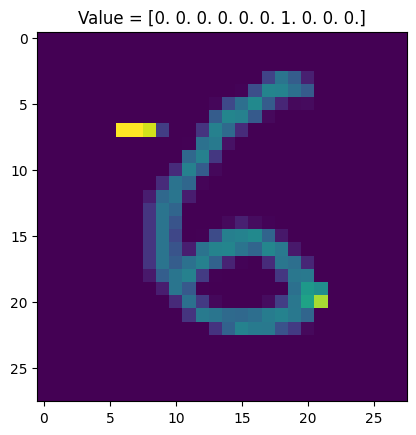

La valeur de prédiction est : 5
La liste des probabilitées est la suivante :
[0.    0.    0.    0.    0.    0.832 0.168 0.    0.    0.   ]


In [36]:
pred = pd.DataFrame({"true_val" : mnist_test_labels, "pred_val" : prediction.argmax(axis=1)})
false_pred = pred[pred["true_val"] != pred["pred_val"]]
false_num = random.choice(false_pred.index)
plt.imshow(test_images[false_num])
plt.title("Value = " + str(test_labels[false_num]))
plt.show()
print("La valeur de prédiction est : " + str(prediction[false_num].argmax()))
print("La liste des probabilitées est la suivante :")
print(np.round(prediction[false_num],3))

Si on relance plusieurs fois le bout de code on se rend compte que la plus part des erreurs viennent du fait que certains chiffres sont dur a décrire même a l'oeil humain.